In [1]:
!pip install squarify

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

In [3]:
df_messi_goles = pd.read_csv('datasets/Messi/Lionel Messi Goals.csv',sep=';',encoding='latin1')

In [4]:
df_messi_goles

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 février 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 décembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw
...,...,...,...,...,...,...,...,...,...,...,...
646,dimanche 17 juin 2007,Liga,Gimnàstic,Gimnàstic,FC Barcelona,35,0,2,NaN,Left foot,Won
647,dimanche 20 mai 2007,Liga,Atlético Madrid,Atlético Madrid,FC Barcelona,80,0,5,NaN,Left foot,Won
648,dimanche 20 mai 2007,Liga,Atlético Madrid,Atlético Madrid,FC Barcelona,39,0,1,NaN,Left foot,Won
649,samedi 17 mars 2007,Liga,Recreativo Huelva,Recreativo Huelva,FC Barcelona,86,0,4,NaN,Left foot,Won


In [5]:
df_messi_goles['Competition Name'].value_counts()

Liga                409
Champions League    106
Copa America          8
World Cup             6
Name: Competition Name, dtype: int64

In [6]:
df_messi_goles = df_messi_goles[df_messi_goles['Competition Name'] != 'Copa America']
df_messi_goles = df_messi_goles[df_messi_goles['Competition Name'] != 'World Cup']
df_messi_goles['Competition Name'].value_counts()

Liga                409
Champions League    106
Name: Competition Name, dtype: int64

In [7]:
df_messi_goles['Goals'] = 1

In [8]:
df_messi_goles=df_messi_goles.groupby('Opponent').agg({'Goals':'count'})

In [9]:
df_messi_goles=df_messi_goles.reset_index()

In [10]:
df_messi_goles.columns

Index(['Opponent', 'Goals'], dtype='object')

In [11]:
df_messi_goles = df_messi_goles[df_messi_goles['Goals'] >= 15].sort_values('Goals',ascending=False)
df_messi_goles

,Opponent,Goals
78,Sevilla,36
12,Atlético Madrid,28
90,Valencia,27
71,Real Madrid,26
10,Athletic de Bilbao,24
34,Espanyol,23
62,Osasuna,23
29,Deportivo La Coruña,20
54,Levante,20
70,Real Betis,20


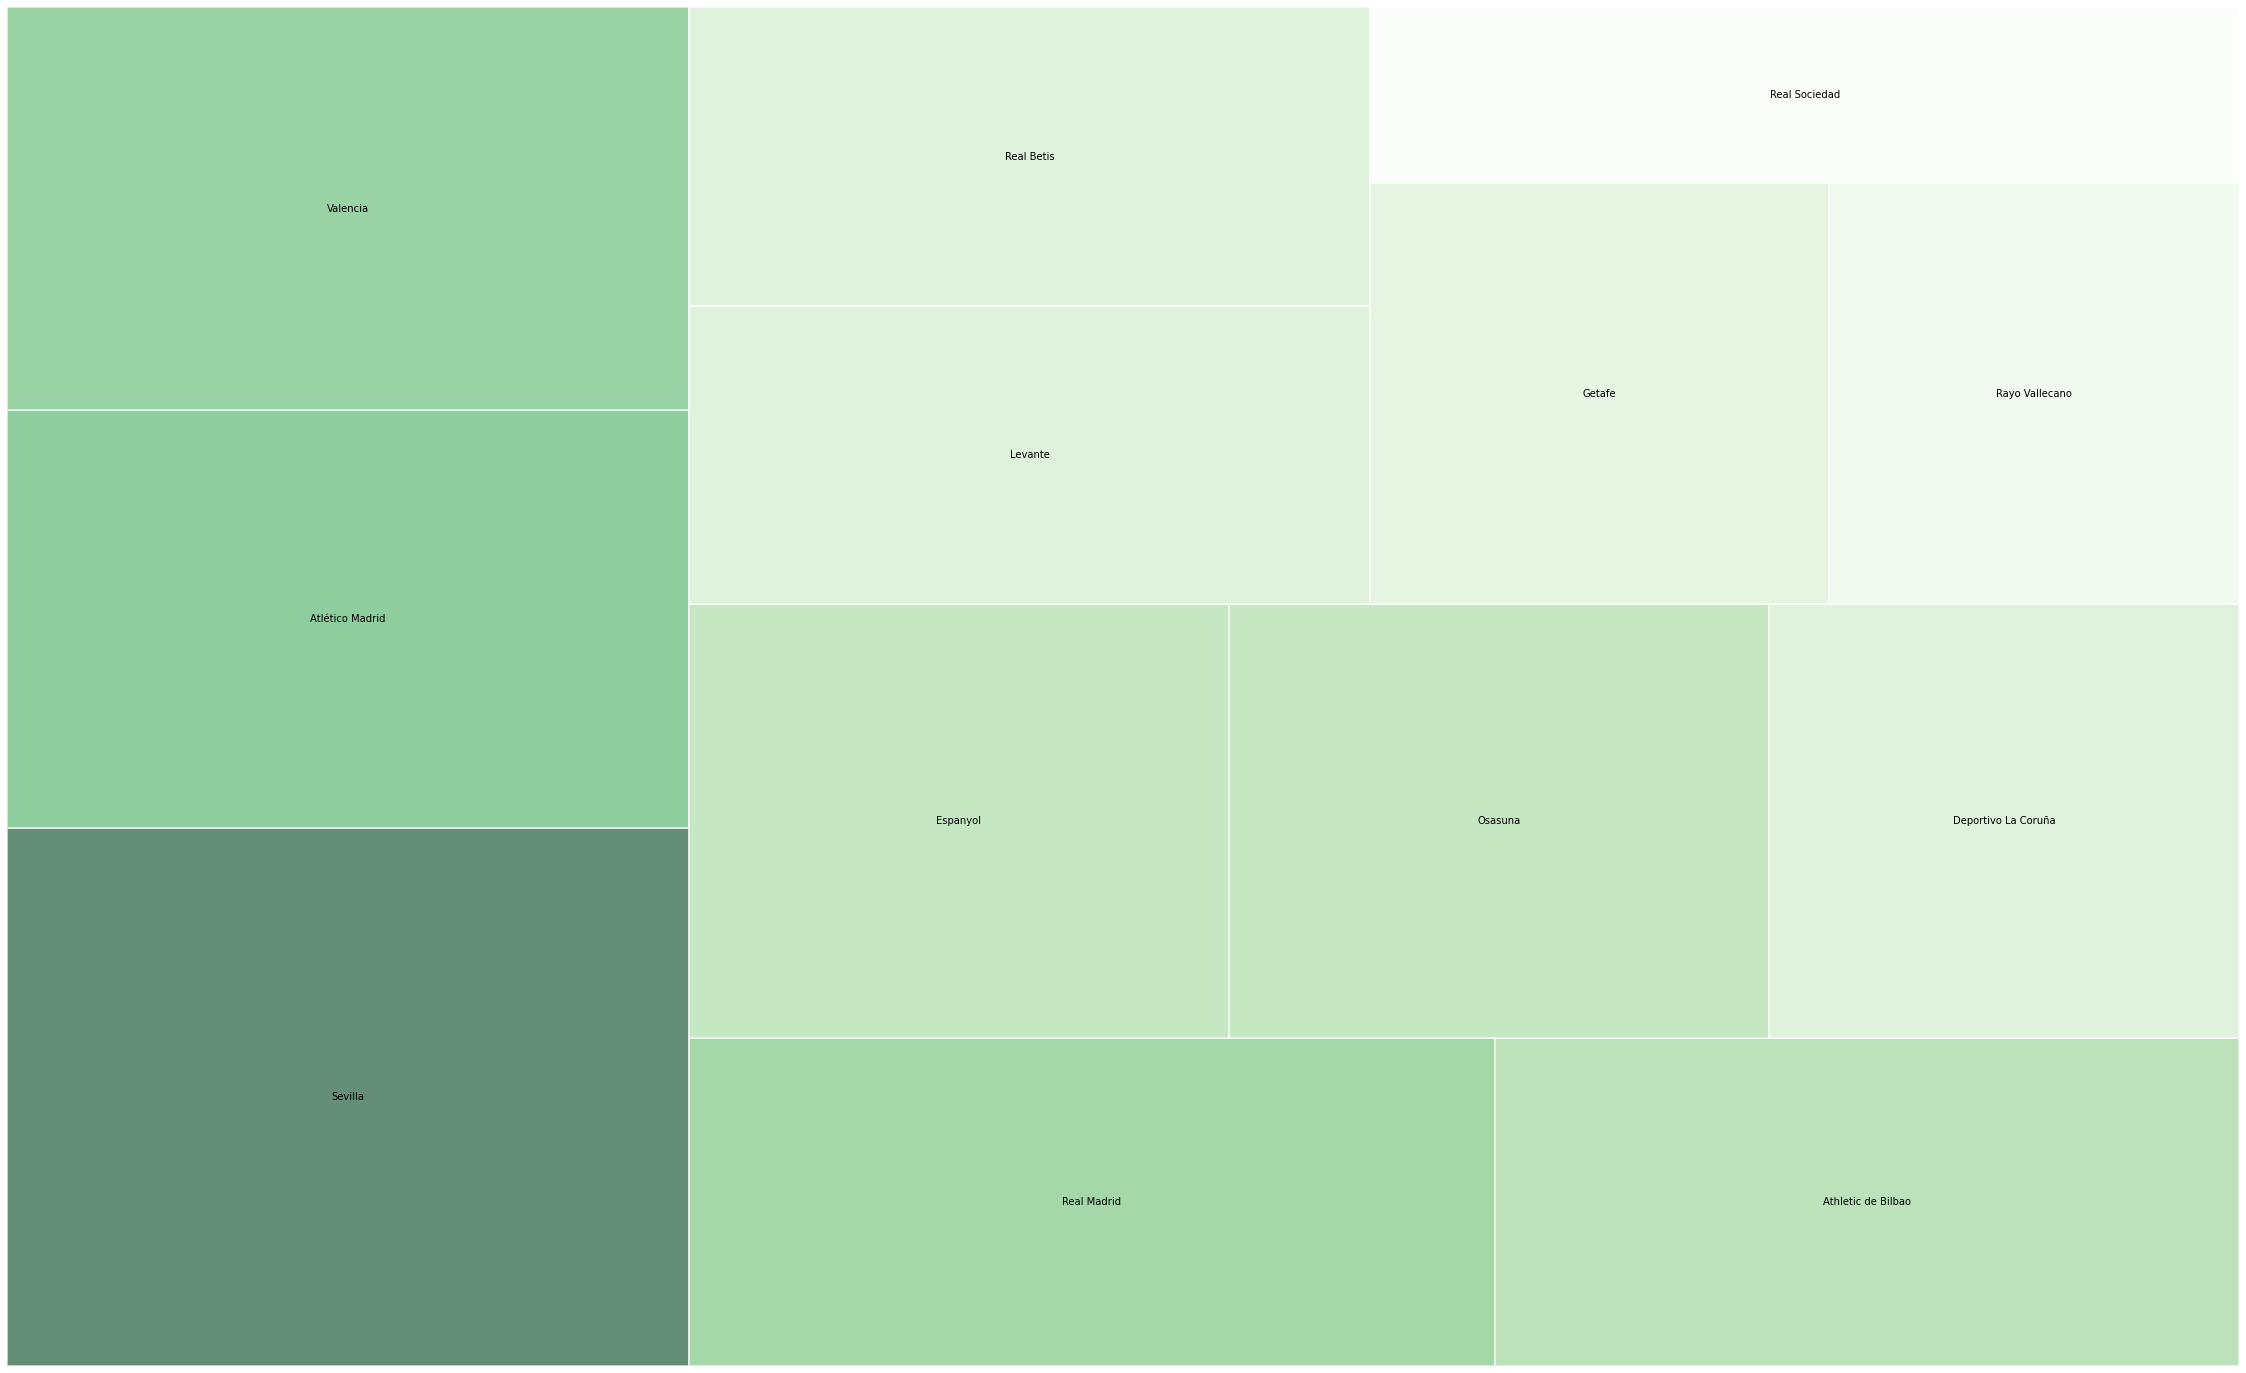

In [14]:
norm = matplotlib.colors.Normalize(vmin=min(df_messi_goles.Goals), vmax=max(df_messi_goles.Goals))
colors = [matplotlib.cm.Greens(norm(value)) for value in df_messi_goles.Goals]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(40, 25)
squarify.plot(label=df_messi_goles.Opponent,sizes=df_messi_goles.Goals, color = colors, alpha=.6,linewidth=2,edgecolor="white")
plt.axis('off')
plt.show()

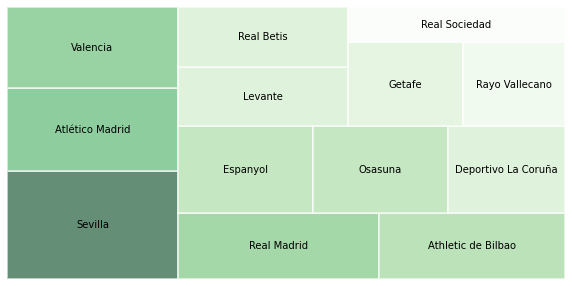

In [13]:
norm = matplotlib.colors.Normalize(vmin=min(df_messi_goles.Goals), vmax=max(df_messi_goles.Goals))
colors = [matplotlib.cm.Greens(norm(value)) for value in df_messi_goles.Goals]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 5)
squarify.plot(label=df_messi_goles.Opponent,sizes=df_messi_goles.Goals, color = colors, alpha=.6,linewidth=2,edgecolor="white")
plt.axis('off')
plt.show()